# Binary trees

In [57]:
import matplotlib.pyplot as plt
from dtreeviz.trees import *
from lolviz import *

import numpy as np
import pandas as pd

%config InlineBackend.figure_format = 'svg'

## Binary tree class definition

A binary tree has a payload (a value) and references to left and right children. One or both of the children references can be `None`.   A reference to a node is the same thing as a reference to a tree as the tree is a self similar data structure. We don't distinguish between the two kinds of references. A reference to the root node is a reference to the entire tree.

Here is a basic tree node class in Python. The constructor requires at least a value to store in the node.

In [58]:
class TreeNode:
  def __init__(self, value, left=None, right=None):
    self.value = value
    self.left = left
    self.right = right
  def __repr__(self):
    return str(self.value)
  def __str__(self):
    return str(self.value)

## Manual tree construction

Here's how to create and visualize a single node:

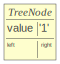

In [59]:
root = TreeNode(1)
treeviz(root)

**Given `left` and `right` nodes,  create node `root` with those nodes as children.**

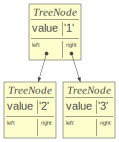

In [15]:
left = TreeNode(2)
right = TreeNode(3)
root = TreeNode(1,left,right)
treeviz(root)

<details>
<summary>Solution</summary>
<pre>
left = TreeNode(2)
right = TreeNode(3)
root = TreeNode(1,left,right)
treeviz(root)
</pre>
</details>

**Write code to create the following tree structure**

<img src="3-level-tree.png" width="30%">

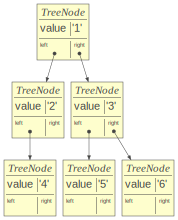

In [16]:
left = ...
right = ...
root = ...
treeviz(root)

<details>
<summary>Solution</summary>
<pre>
left = TreeNode(2,TreeNode(4))
right = TreeNode(3,TreeNode(5),TreeNode(6))
root = TreeNode(1,left,right)
treeviz(root)
</pre>
</details>

## Walking trees manually

To walk a tree, we simply follow the left and right children references, avoiding any `None` references.

**Q.** Given tree `r` shown here, what Python expressions refer to the nodes with 443 and 17 in them?

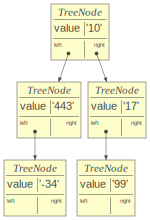

In [23]:
left = TreeNode(443,TreeNode(-34))
right = TreeNode(17,TreeNode(99))
r = TreeNode(10,left,right)
treeviz(r)

<details>
<summary>Solution</summary>
<pre>
r.left, r.right
</pre>
</details>

**Q.** Given the same tree `r`, what Python expressions refer to the nodes with -34 and 99 in them?

In [25]:
r.left.left, r.right.left

(-34, 99)

<details>
<summary>Solution</summary>
<pre>
r.left.left, r.right.left
</pre>
</details>

## Walking all nodes

Now let's create a function to walk all nodes in a tree. Remember that our template for creating any recursive function looks like this:

```
def f(input):
    1. check termination condition
    2. process the active input region / current node, etc…
    3. invoke f on subregion(s)
    4. combine and return results
```

In [27]:
def walk(p:TreeNode):
    if p is None: return           # step 1
    print(p.value)                 # step 2
    walk(p.left)                   # step 3
    walk(p.right)                  # step 3 (there is no step 4 for this problem)

Let's create the simple 3-level tree we had before:

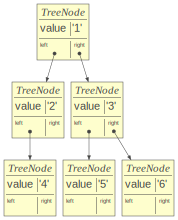

In [31]:
left = TreeNode(2,TreeNode(4))
right = TreeNode(3,TreeNode(5),TreeNode(6))
root = TreeNode(1,left,right)
treeviz(root)

**Q.** What is the output of running `walk(root)`?

<details>
<summary>Solution</summary>
    We walk the tree depth first, from left to right<p>
<pre>
1
2
4
3
5
6
</pre>
</details>

## Searching through nodes

Here's how to search for an element as you walk, terminating as soon as the node with `x` is found:

In [40]:
def search(p:TreeNode, x:object):
    print("enter ",p)
    if p is None: return None
    print(p)
    if x==p.value: return p
    q = search(p.left, x)
    if q is not None: return q
    q = search(p.right, x)
    return q

**Q.** What is the output of running `search(root, 5)`?

<details>
<summary>Solution</summary>
    We walk the tree depth first as before, but now we stop when we reach the node with 5:<p>
<pre>
1
2
4
3
5
</pre>
</details>

To see the recursion entering and exiting (or discovering and finishing) nodes, here is a variation that prints out its progress through the tree:

In [49]:
def search(p:TreeNode, x:object):
    if p is None: return None
    print("enter ",p)
    if x==p.value:
        print("exit  ",p)
        return p
    q = search(p.left, x)
    if q is not None:
        print("exit  ",p)
        return q
    q = search(p.right, x)
    print("exit  ",p)
    return q

In [51]:
search(root, 5)

enter  1
enter  2
enter  4
exit   4
exit   2
enter  3
enter  5
exit   5
exit   3
exit   1


5

## Creating (random) decision tree "stumps"

A regression tree stump is a tree with a decision node at the root and two predictor leaves.  These are used by gradient boosting machines as the "weak learners."

In [60]:
class TreeNode: # acts as decision node and leaf. it's leaf if split is None
  def __init__(self, split, y, left=None, right=None):
    self.split = split
    self.y = y
    self.left = left
    self.right = right
  def __repr__(self):
    return str(self.value)
  def __str__(self):
    return str(self.value)

In [61]:
df = pd.DataFrame()
df["sqfeet"] = [750, 800, 850, 900,950]
df["rent"] = [1160, 1200, 1280, 1450,1300]
df

,sqfeet,rent
0,750,1160
1,800,1200
2,850,1280
3,900,1450
4,950,1300


The following code shows where sklearn would do a split with a normal decision tree.

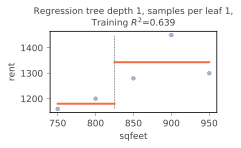

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(3,1.5))
X, y = df.sqfeet.values, df.rent.values
t = rtreeviz_univar(ax,
                    X, y,
                    max_depth=1,
                    feature_name='sqfeet',
                    target_name='rent',
                    fontsize=9,
                    colors={'scatter_edge': 'black'})

Instead of picking the optimal split point, we can choose a random value in between the minimum and maximum x value, like extremely random forests do:

In [110]:
def stumpfit(x, y):
    if len(x)==1: # if only one x value, don't create decision node
        return TreeNode(None, y)
    split = round(np.random.uniform(min(x),max(x)))
    t = TreeNode(split,y)
    t.left = TreeNode(None,y[x<split])
    t.right = TreeNode(None,y[x>=split])
    return t

**Run the following code multiple times to see how it creates different y lists in the nodes, according to the split value.**

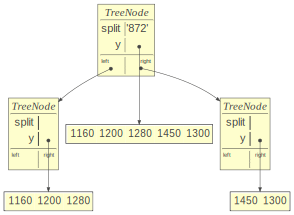

In [111]:
root = stumpfit(X,y)
treeviz(root)

## Creating random decision trees (single variable)

And now to demonstrate the magical recursion. If we replace

```
t.left = TreeNode(None,y[x<split])
```

with

```
t.left  = treefit(x[x<split],  y[x<split])
```

Then all of the sudden we get a full decision tree, rather than just a stump!

In [114]:
def treefit(x, y):
    if len(x)==1:
        return TreeNode(None, y)
    split = round(np.random.uniform(min(x),max(x)))
    t = TreeNode(split,y)
    t.left  = treefit(x[x<split],  y[x<split])
    t.right = treefit(x[x>=split], y[x>=split])
    return t

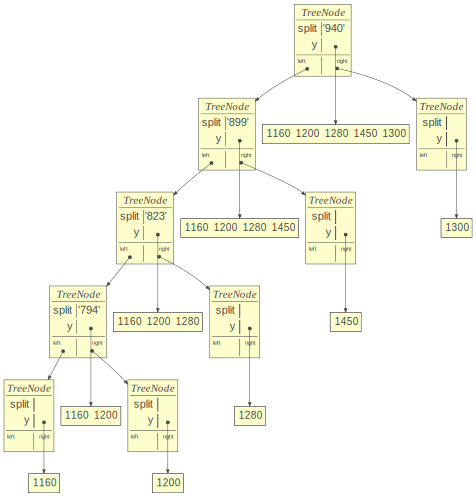

In [115]:
root = treefit(X,y)
treeviz(root)

**Q.** How would you modify `treefit()` so that it creates a typical decision tree rather than a randomized decision tree?

<details>
<summary>Solution</summary>
Instead of choosing a random split, we would pick the split value in $x$ that got the best average child $y$ purity/similarity. In other words, exhaustively test each $x$ value as candidate split point by computing the MSE for left and right $y$ subregions. The split point that gets the best weighted average for left and right MSE, is the optimal split point.
</details>